<a href="https://colab.research.google.com/github/rb58853/ML-RSI-Images/blob/main/code/CLIP-Embedding/CLIPEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and import libraries

In [1]:
!git clone https://github.com/rb58853/ML-RSI-Images.git
!python3 -m pip install opencv-python matplotlib
!python3 -m pip install 'git+https://github.com/rb58853/segment-anything.git'

import os
os.chdir('ML-RSI-Images/code/CLIP-Embedding')
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Cloning into 'ML-RSI-Images'...
remote: Enumerating objects: 1126, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 1126 (delta 90), reused 147 (delta 75), pack-reused 952
Receiving objects: 100% (1126/1126), 25.13 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (492/492), done.
  Cloning https://github.com/rb58853/segment-anything.git to /tmp/pip-req-build-2kgifu1u
  Running command git clone --filter=blob:none --quiet https://github.com/rb58853/segment-anything.git /tmp/pip-req-build-2kgifu1u
  Resolved https://github.com/rb58853/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=87b17d09795fcc352aee1a35c9b9d78e0bce6c1af57991b59192523fcc275fea
  Stored in directory: /tmp/pip-ephem-wheel-cache-k3r_j9do/wheels/5b/3b/a9/8a4ffebff15c8288d2f9fb53f57947811c48cc

In [2]:
from process_images import ProcessImages
from PIL import Image
process = ProcessImages()
image_path = '../../images/'

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

PyTorch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
CUDA is available: True


### Utils

In [3]:
from similarity import Similarity
from features import Text

def print_sim(text,image, print_neigh_sims = False):
    cosine_similitary = Similarity.cosine(text,image)
    cosine_and_pos_similitary = Similarity.cosine_and_pos(text,image)
    end_similitary = Similarity.calculate(text,image, print_ = print_neigh_sims)

    print(f'SIMILARITY')
    print(f'   ⦿ cosine: {cosine_similitary}')
    print(f'   ⦿ cosine_pos: {cosine_and_pos_similitary}')
    print(f'   ⦿ using region relation: {end_similitary}')

### Testing for image_3

In [4]:
ranking = process.ranking(image_path+'image_3.jpg', 'box')
images = process.image_features

In [5]:
images.set_neighbords()

In [6]:
image = images[17]

text_0 = Text("a dog laying on a blue pillow",(0.7,0.55))
text_0.neighbords['left'] = [Text("a gray cat laying",(0.4,0.55))]

text_1 = Text("a bird eating fruit",(0.7,0.55))
text_1.neighbords['left'] = [Text("a gray cat laying",(0.4,0.55))]

text_2 = Text("a dog laying on a blue pillow",(0.7,0.55))
text_2.neighbords['left'] = [Text("a apple",(0.4,0.55))]

texts = [text_1, text_2, text_0]


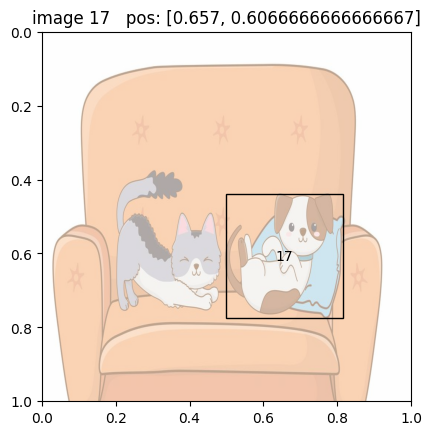

___________________________________________________

Testeando texto contra la segmentacion 17
___________________________________________________

TEXT: a bird eating fruit
LEFT:[a gray cat laying]
SIMILARITY
   ⦿ cosine: 0.15731118619441986
   ⦿ cosine_pos: 0.1361830494878079
   ⦿ using region relation: 0.1361830494878079
___________________________________________________

TEXT: a dog laying on a blue pillow
LEFT:[a apple]
SIMILARITY
   ⦿ cosine: 0.25085294246673584
   ⦿ cosine_pos: 0.2845444769971713
   ⦿ using region relation: 0.27392760197141813
___________________________________________________

TEXT: a dog laying on a blue pillow
LEFT:[a gray cat laying]
SIMILARITY
   ⦿ cosine: 0.25085294246673584
   ⦿ cosine_pos: 0.2845444769971713
   ⦿ using region relation: 0.3725487362586054
___________________________________________________



In [7]:
images.plot_from_image(image)
print('___________________________________________________\n')
print('Testeando texto contra la segmentacion 17')
print('___________________________________________________\n')
for text in texts:
    print(f'TEXT: {text.text}')
    print('left:'.upper(), end="")
    print(text.neighbords['left'])
    print_sim(text, image)
    print('___________________________________________________\n')

#### See Features

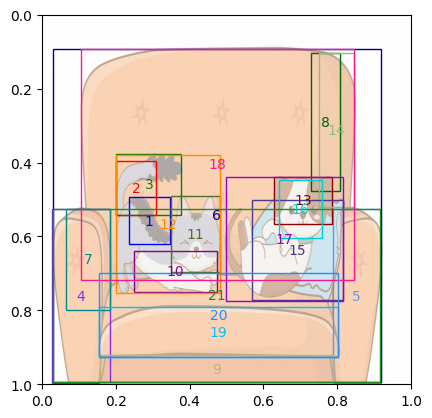

In [8]:
images.plot_regions()

In [9]:
for item in ranking:
    print(f'{item}: {ranking[item]}')

image 0: 1
image 6: 0.9425204396247864
image 21: 0.8441221117973328
image 12: 0.8413178324699402
image 18: 0.8397975564002991
image 17: 0.8145467042922974
image 11: 0.7714503407478333
image 15: 0.7697007060050964
image 20: 0.7145812511444092
image 13: 0.7107961773872375
image 16: 0.70314621925354
image 2: 0.683867871761322
image 3: 0.6529771089553833
image 4: 0.6471889019012451
image 5: 0.6441677808761597
image 7: 0.6379749774932861
image 1: 0.6150767803192139
image 14: 0.6059066653251648
image 10: 0.6008025407791138
image 8: 0.5982453227043152
image 9: 0.5712727308273315
image 19: 0.5643380880355835


### Testing for image_7

In [10]:
ranking = process.ranking(image_path+'image_7.jpg', 'box')
images = process.image_features

In [11]:
images.set_neighbords()

In [40]:
image = images[10]

text_0 = Text("A bouquet of roses",(0.5,0.3))
text_0.neighbords['buttom'] = [Text("a table",(0.5,0.6))]

text_1 = Text("a roses",(0.5,0.3))
text_1.neighbords['buttom'] = [Text("a bedside table",(0.5,0.6))]

text_2 = Text("A bouquet of roses",(0.5,0.3))
text_2.neighbords['buttom'] = [Text("a gray and black bedside table",(0.5,0.6))]

text_3 = Text("A bouquet of roses",(0.5,0.3))
text_3.neighbords['buttom'] = [
    Text("a gray and black bedside table",(0.5,0.6)),
    Text("a white drawer",(0.5,0.7)),
]

texts = [text_0, text_1, text_2, text_3]


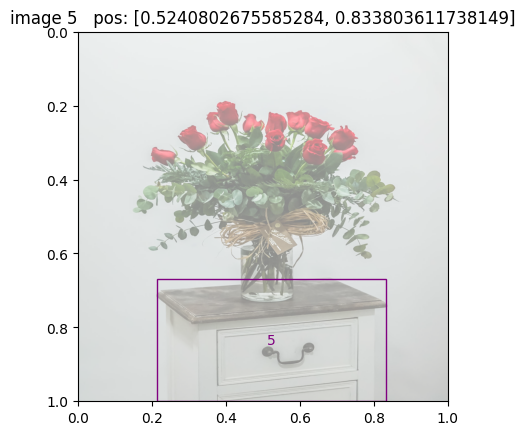

___________________________________________________

TEXT: a gray and black bedside table
POS: (0.5,0.6)
SIMILARITY
   ⦿ cosine: 0.3167628347873688
   ⦿ cosine_pos: 0.35411465824926147
   ⦿ using region relation: 0.35411465824926147


In [47]:
images.plot_from_index(5)
print('___________________________________________________\n')
print("TEXT: a gray and black bedside table")
print("POS: (0.5,0.6)")
print_sim(Text("a gray and black bedside table",(0.5,0.6)), images[5])

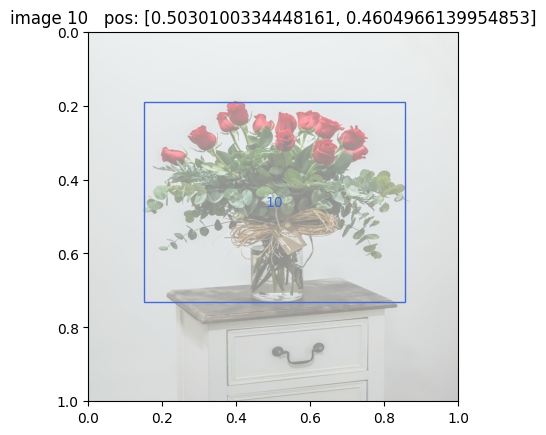

___________________________________________________

Testeando texto contra la segmentacion 10
___________________________________________________

TEXT: A bouquet of roses
BUTTOM:[a table]
SIMILARITY
   ⦿ cosine: 0.2806638479232788
   ⦿ cosine_pos: 0.31585035808965767
   ⦿ using region relation: 0.4101227604711571
___________________________________________________

TEXT: a roses
BUTTOM:[a bedside table]
SIMILARITY
   ⦿ cosine: 0.26832765340805054
   ⦿ cosine_pos: 0.3019675887770827
   ⦿ using region relation: 0.398580293932889
___________________________________________________

TEXT: A bouquet of roses
BUTTOM:[a gray and black bedside table]
SIMILARITY
   ⦿ cosine: 0.2806638479232788
   ⦿ cosine_pos: 0.31585035808965767
   ⦿ using region relation: 0.4276975997024836
___________________________________________________

TEXT: A bouquet of roses
BUTTOM:[a gray and black bedside table, a white drawer]
SIMILARITY
   ⦿ cosine: 0.2806638479232788
   ⦿ cosine_pos: 0.31585035808965767
   ⦿ u

In [48]:
images.plot_from_image(image)
print('___________________________________________________\n')
print('Testeando texto contra la segmentacion 10')
print('___________________________________________________\n')
for text in texts:
    print(f'TEXT: {text.text}')
    print('buttom:'.upper(), end="")
    print(text.neighbords['buttom'])
    print_sim(text, image)
    print('___________________________________________________\n')

#### See Features

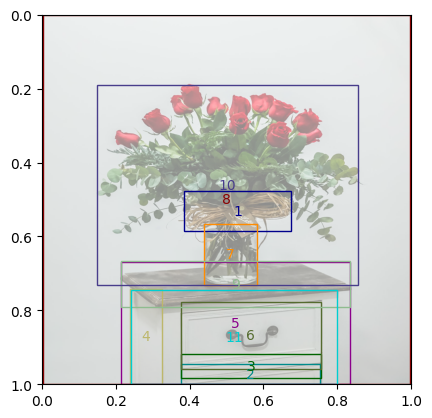

In [50]:
images.plot_regions()

In [28]:
for item in ranking:
    print(f'{item}: {ranking[item]}')

image 0: 1
image 8: 0.9988778233528137
image 10: 0.9532157182693481
image 5: 0.7506459355354309
image 1: 0.6751694679260254
image 3: 0.6448029279708862
image 7: 0.6305364370346069
image 9: 0.6291207671165466
image 4: 0.6220675706863403
image 11: 0.6164882183074951
image 6: 0.6066015958786011
image 2: 0.591688871383667
